In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import TSML

In [2]:
X1=np.random.randn(1000,2)
X2=np.random.randn(1000,2)+5
X1=np.hstack((np.ones((1000,1)),X1))
X2=np.hstack((np.zeros((1000,1)),X2))
X=np.vstack((X1,X2))

In [3]:
np.random.shuffle(X)
y=X[:,:1]
X=X[:,1:]

In [4]:
colors=np.array(["red","blue"])

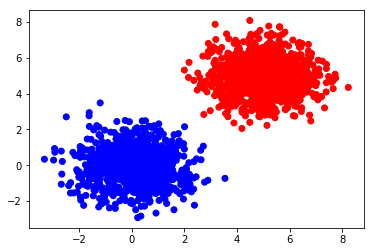

In [5]:
plt.scatter(X[:,0],X[:,1], color=colors[y.reshape(-1).astype(int)])

In [6]:
def cost(y,p):
    Err=[]
    zeros=np.where(y==0)
    ones=np.where(y==1)
    Err=np.hstack((-y[ones]*np.log(p[ones]),-(1-y[zeros])*np.log(1-p[zeros])))
    return np.mean(Err)

def sigmoid(X):
    return 1/(1+np.exp(-X))

def ReLU(X):
    return X*(X>0)

def deReLU(Z):
    return Z>0

def dertanh(X):
    return 1-np.power(np.tanh(X),2)

In [7]:
#Make this unecessarily complicated, hopefully to prove the point
layers=2
nodes=[5]*layers+[1]
activs=[np.tanh]*layers+[sigmoid]
deracts=[dertanh]*layers

In [143]:
modelGD=TSML.BatchNeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)
start=time.time()
modelGD.train(X,y,101,X.shape[0],1e-4,error_calc=False)
end=time.time()


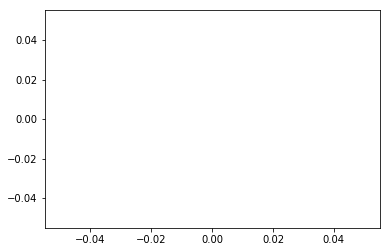

In [144]:
plt.plot(modelGD.error)

In [145]:
modelGD.predict(X)
(y==modelGD.predictions).mean()

1.0

In [146]:
end-start

0.14582347869873047

In [147]:
modelSGD=TSML.BatchNeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)
startSGD=time.time()
modelSGD.train(X,y,10,1,1e-3,error_calc=False)
endSGD=time.time()

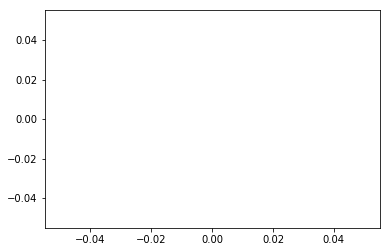

In [148]:
plt.plot(modelSGD.error)

In [149]:
modelSGD.predict(X)
(y==modelSGD.predictions).mean()

1.0

In [150]:
endSGD-startSGD

2.156571388244629

In [151]:
modelBGD=TSML.BatchNeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)
startBGD=time.time()
modelBGD.train(X,y,10,20,1e-3,error_calc=False)
endBGD=time.time()

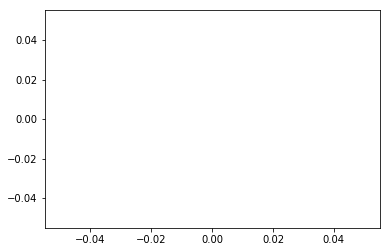

In [152]:
plt.plot(modelBGD.error)

In [153]:
modelBGD.predict(X)
(y==modelBGD.predictions).mean()

1.0

In [154]:
endBGD-startBGD

0.15454387664794922